In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# importing file from gdrive
link = 'https://drive.google.com/open?id=1N-NiW842fQtA7-aSWOaVOufxTRAbBgTZ' # Paste the shareable link here

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv') # file will be stored as train.csv in the colab directory

1N-NiW842fQtA7-aSWOaVOufxTRAbBgTZ


In [0]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import os
os.listdir('/content/')

['.config', 'adc.json', 'train.csv', 'sample_data']

In [0]:
# reading data
raw_data = pd.read_csv('train.csv', encoding = 'unicode_escape', parse_dates=['InvoiceDate'])

In [0]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [0]:
raw_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [0]:
#raw_data['CustomerID'] = raw_data['CustomerID'].astype('int')

In [0]:
raw_data.shape

(541909, 8)

In [0]:
raw_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [0]:
raw_data = raw_data[pd.notnull(raw_data['CustomerID'])]

In [0]:
raw_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [0]:
raw_data.shape

(406829, 8)

In [0]:
raw_data['CustomerID'] = raw_data['CustomerID'].astype('int')

In [0]:
raw_data['InvoiceDate'] = raw_data['InvoiceDate'].dt.date

In [0]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


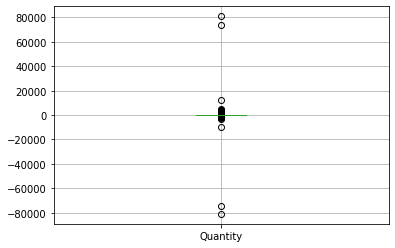

In [0]:
raw_data.boxplot(column = 'Quantity')

In [0]:
raw_data['Quantity'].describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [0]:
raw_data[raw_data['Quantity'] > 10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25,0.00,13256,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446,United Kingdom


In [0]:
raw_data[raw_data['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04,0.0,14410,United Kingdom


In [0]:
raw_data['CustomerID'].nunique(), raw_data['InvoiceNo'].nunique(), raw_data['StockCode'].nunique()

(4372, 22190, 3684)

In [0]:
raw_data['Country'].value_counts().head()

United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: Country, dtype: int64

In [0]:
raw_data['TotalAmount'] = raw_data['Quantity'] * raw_data['UnitPrice']

In [0]:
# raw_data.groupby('CustomerID')[['InvoiceDate','InvoiceNo','TotalAmount']].agg(['max','count','sum'])

In [0]:
# checking record per dates
raw_data['InvoiceDate'].value_counts().sort_index()

2010-12-01    1968
2010-12-02    2044
2010-12-03    1117
2010-12-05    2724
2010-12-06    1974
              ... 
2011-12-05    3398
2011-12-06    2654
2011-12-07    2196
2011-12-08    2599
2011-12-09     624
Name: InvoiceDate, Length: 305, dtype: int64

In [0]:
# making splits of data
raw_data_4mon_1 = raw_data[raw_data['InvoiceDate'] < pd.to_datetime('2011-04-1').date()]
raw_data_4mon_2 = raw_data[(raw_data['InvoiceDate'] >= pd.to_datetime('2011-04-1').date()) & (raw_data['InvoiceDate'] < pd.to_datetime('2011-08-1').date())]
raw_data_4mon_3 = raw_data[raw_data['InvoiceDate'] >= pd.to_datetime('2011-08-1').date()]

raw_data_6mon_1 = raw_data[raw_data['InvoiceDate'] < pd.to_datetime('2011-06-1').date()]
raw_data_6mon_2 = raw_data[raw_data['InvoiceDate'] >= pd.to_datetime('2011-06-1').date()]

In [0]:
print(raw_data_4mon_1['InvoiceDate'].min(), raw_data_4mon_1['InvoiceDate'].max())
print(raw_data_4mon_2['InvoiceDate'].min(), raw_data_4mon_2['InvoiceDate'].max())
print(raw_data_4mon_3['InvoiceDate'].min(), raw_data_4mon_3['InvoiceDate'].max())
print(raw_data_6mon_1['InvoiceDate'].min(), raw_data_6mon_1['InvoiceDate'].max())
print(raw_data_6mon_2['InvoiceDate'].min(), raw_data_6mon_2['InvoiceDate'].max())

2010-12-01 2011-03-31
2011-04-01 2011-07-31
2011-08-01 2011-12-09
2010-12-01 2011-05-31
2011-06-01 2011-12-09


In [0]:
# RFM for each timeframe:

date_t_4mon_1 = raw_data_4mon_1.groupby('CustomerID')['InvoiceDate'].max().to_frame()
date_t_4mon_1.reset_index(inplace = True)
freq_4mon_1 = raw_data_4mon_1.groupby('CustomerID')['InvoiceNo'].count().to_frame()
freq_4mon_1.reset_index(inplace = True)
monet_4mon_1 = raw_data_4mon_1.groupby('CustomerID')['TotalAmount'].sum().to_frame()
monet_4mon_1.reset_index(inplace = True)
rfm_data_4mon_1 = date_t_4mon_1.merge(freq_4mon_1, how = 'inner', on = 'CustomerID')
rfm_data_4mon_1 = rfm_data_4mon_1.merge(monet_4mon_1, how = 'inner', on = 'CustomerID')
rfm_data_4mon_1.columns = ['CustomerID','Recency','Frequency','Monetory']
rfm_data_4mon_1['Recency'] = (raw_data_4mon_1['InvoiceDate'].max() - rfm_data_4mon_1['Recency']).astype('timedelta64[D]').astype(int)
rfm_data_4mon_1.head()

,CustomerID,Recency,Frequency,Monetory
0,12346,72,2,0.00
1,12347,64,60,1187.18
2,12348,65,23,1120.24
3,12350,57,17,334.40
4,12352,9,48,601.18


In [0]:
date_t_4mon_2 = raw_data_4mon_2.groupby('CustomerID')['InvoiceDate'].max().to_frame()
date_t_4mon_2.reset_index(inplace = True)
freq_4mon_2 = raw_data_4mon_2.groupby('CustomerID')['InvoiceNo'].count().to_frame()
freq_4mon_2.reset_index(inplace = True)
monet_4mon_2 = raw_data_4mon_2.groupby('CustomerID')['TotalAmount'].sum().to_frame()
monet_4mon_2.reset_index(inplace = True)

rfm_data_4mon_2 = date_t_4mon_2.merge(freq_4mon_2, how = 'inner', on = 'CustomerID')
rfm_data_4mon_2 = rfm_data_4mon_2.merge(monet_4mon_2, how = 'inner', on = 'CustomerID')
rfm_data_4mon_2.columns = ['CustomerID','Recency','Frequency','Monetory']
rfm_data_4mon_2['Recency'] = (raw_data_4mon_2['InvoiceDate'].max() - rfm_data_4mon_2['Recency']).astype('timedelta64[D]').astype(int)
rfm_data_4mon_2.head()

,CustomerID,Recency,Frequency,Monetory
0,12347,52,42,1018.77
1,12348,117,5,367.00
2,12353,73,4,89.00
3,12354,101,58,1079.40
4,12355,83,13,459.40


In [0]:
date_t_4mon_3 = raw_data_4mon_3.groupby('CustomerID')['InvoiceDate'].max().to_frame()
date_t_4mon_3.reset_index(inplace = True)
freq_4mon_3 = raw_data_4mon_3.groupby('CustomerID')['InvoiceNo'].count().to_frame()
freq_4mon_3.reset_index(inplace = True)
monet_4mon_3 = raw_data_4mon_3.groupby('CustomerID')['TotalAmount'].sum().to_frame()
monet_4mon_3.reset_index(inplace = True)

rfm_data_4mon_3 = date_t_4mon_3.merge(freq_4mon_3, how = 'inner', on = 'CustomerID')
rfm_data_4mon_3 = rfm_data_4mon_3.merge(monet_4mon_3, how = 'inner', on = 'CustomerID')
rfm_data_4mon_3.columns = ['CustomerID','Recency','Frequency','Monetory']
rfm_data_4mon_3['Recency'] = (raw_data_4mon_3['InvoiceDate'].max() - rfm_data_4mon_3['Recency']).astype('timedelta64[D]').astype(int)
rfm_data_4mon_3.head()

,CustomerID,Recency,Frequency,Monetory
0,12347,2,80,2104.05
1,12348,75,3,310.00
2,12349,18,73,1757.55
3,12352,36,47,944.23
4,12356,22,2,58.35


In [0]:
date_t_6mon_2 = raw_data_6mon_2.groupby('CustomerID')['InvoiceDate'].max().to_frame()
date_t_6mon_2.reset_index(inplace = True)
freq_6mon_2 = raw_data_6mon_2.groupby('CustomerID')['InvoiceNo'].nunique().to_frame()
freq_6mon_2.reset_index(inplace = True)
monet_6mon_2 = raw_data_6mon_2.groupby('CustomerID')['TotalAmount'].sum().to_frame()
monet_6mon_2.reset_index(inplace = True)
distinct_items_6mon_2 = raw_data_6mon_2.groupby('CustomerID')['StockCode'].nunique().to_frame()
distinct_items_6mon_2.reset_index(inplace = True)
quantity_6mon_2 = raw_data_6mon_2.groupby('CustomerID')['Quantity'].sum().to_frame()
quantity_6mon_2.reset_index(inplace = True)

rfm_data_6mon_2 = date_t_6mon_2.merge(freq_6mon_2, how = 'inner', on = 'CustomerID')
rfm_data_6mon_2 = rfm_data_6mon_2.merge(monet_6mon_2, how = 'inner', on = 'CustomerID')
rfm_data_6mon_2 = rfm_data_6mon_2.merge(quantity_6mon_2, how = 'inner', on = 'CustomerID')
rfm_data_6mon_2 = rfm_data_6mon_2.merge(distinct_items_6mon_2, how = 'inner', on = 'CustomerID')
rfm_data_6mon_2.columns = ['CustomerID','Recency','Frequency','Monetory','Quantity','#Distinct_items']
rfm_data_6mon_2['Recency'] = (raw_data_6mon_2['InvoiceDate'].max() - rfm_data_6mon_2['Recency']).astype('timedelta64[D]').astype(int)
rfm_data_6mon_2['ASP'] = round(rfm_data_6mon_2['Monetory']/rfm_data_6mon_2['Quantity'],2)
rfm_data_6mon_2.head()

,CustomerID,Recency,Frequency,Monetory,Quantity,#Distinct_items,ASP
0,12347,2,4,2486.57,1341,66,1.85
1,12348,75,1,310.00,217,3,1.43
2,12349,18,1,1757.55,631,73,2.79
3,12352,36,3,944.23,282,39,3.35
4,12356,22,1,58.35,5,2,11.67


In [0]:
date_t_6mon_1 = raw_data_6mon_1.groupby('CustomerID')['InvoiceDate'].max().to_frame()
date_t_6mon_1.reset_index(inplace = True)
freq_6mon_1 = raw_data_6mon_1.groupby('CustomerID')['InvoiceNo'].nunique().to_frame()
freq_6mon_1.reset_index(inplace = True)
monet_6mon_1 = raw_data_6mon_1.groupby('CustomerID')['TotalAmount'].sum().to_frame()
monet_6mon_1.reset_index(inplace = True)
distinct_items_6mon_1 = raw_data_6mon_1.groupby('CustomerID')['StockCode'].nunique().to_frame()
distinct_items_6mon_1.reset_index(inplace = True)
quantity_6mon_1 = raw_data_6mon_1.groupby('CustomerID')['Quantity'].sum().to_frame()
quantity_6mon_1.reset_index(inplace = True)

rfm_data_6mon_1 = date_t_6mon_1.merge(freq_6mon_1, how = 'inner', on = 'CustomerID')
rfm_data_6mon_1 = rfm_data_6mon_1.merge(monet_6mon_1, how = 'inner', on = 'CustomerID')
rfm_data_6mon_1 = rfm_data_6mon_1.merge(quantity_6mon_1, how = 'inner', on = 'CustomerID')
rfm_data_6mon_1 = rfm_data_6mon_1.merge(distinct_items_6mon_1, how = 'inner', on = 'CustomerID')
rfm_data_6mon_1.columns = ['CustomerID','Recency','Frequency','Monetory','Quantity','#Distinct_items']
rfm_data_6mon_1['Recency'] = (raw_data_6mon_1['InvoiceDate'].max() - rfm_data_6mon_1['Recency']).astype('timedelta64[D]').astype(int)
rfm_data_6mon_1['ASP'] = round(rfm_data_6mon_2['Monetory']/rfm_data_6mon_2['Quantity'],2)
rfm_data_6mon_1.head()

,CustomerID,Recency,Frequency,Monetory,Quantity,#Distinct_items,ASP
0,12346,133,2,0.00,0,1,1.85
1,12347,54,3,1823.43,1117,63,1.43
2,12348,56,3,1487.24,2124,22,2.79
3,12350,118,1,334.40,197,17,3.35
4,12352,70,8,601.18,188,26,11.67


In [0]:
date_t = raw_data.groupby('CustomerID')['InvoiceDate'].max().to_frame()
date_t.reset_index(inplace = True)
freq = raw_data.groupby('CustomerID')['InvoiceNo'].nunique().to_frame()
freq.reset_index(inplace = True)
monet = raw_data.groupby('CustomerID')['TotalAmount'].sum().to_frame()
monet.reset_index(inplace = True)
distinct_items = raw_data.groupby('CustomerID')['StockCode'].nunique().to_frame()
distinct_items.reset_index(inplace = True)
quantity = raw_data.groupby('CustomerID')['Quantity'].sum().to_frame()
quantity.reset_index(inplace = True)

rfm_data = date_t.merge(freq, how = 'inner', on = 'CustomerID')
rfm_data = rfm_data.merge(monet, how = 'inner', on = 'CustomerID')
rfm_data = rfm_data.merge(quantity, how = 'inner', on = 'CustomerID')
rfm_data = rfm_data.merge(distinct_items, how = 'inner', on = 'CustomerID')
rfm_data.columns = ['CustomerID','Recency','Frequency','Monetory','Quantity','#Distinct_items']
rfm_data['Recency'] = (raw_data['InvoiceDate'].max() - rfm_data['Recency']).astype('timedelta64[D]').astype(int)
rfm_data['ASP'] = round(rfm_data_6mon_2['Monetory']/rfm_data_6mon_2['Quantity'],2)
rfm_data.head()

,CustomerID,Recency,Frequency,Monetory,Quantity,#Distinct_items,ASP
0,12346,325,2,0.00,0,1,1.85
1,12347,2,7,4310.00,2458,103,1.43
2,12348,75,4,1797.24,2341,22,2.79
3,12349,18,1,1757.55,631,73,3.35
4,12350,310,1,334.40,197,17,11.67


In [0]:
rfm_data.describe()

,CustomerID,Recency,Frequency,Monetory,Quantity,#Distinct_items,ASP
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,3572.0000
mean,15299.677722,91.581199,5.075480,1898.459701,1122.344007,61.211116,NaN
std,1722.390705,100.772139,9.338754,8219.345141,4672.790720,85.425119,NaN
min,12346.000000,0.000000,1.000000,-4287.630000,-303.000000,1.000000,-inf
25%,13812.750000,16.000000,1.000000,293.362500,153.000000,15.000000,1.3400
50%,15300.500000,50.000000,3.000000,648.075000,365.000000,35.000000,1.7500
75%,16778.250000,143.000000,5.000000,1611.725000,962.250000,77.000000,2.2725
max,18287.000000,373.000000,248.000000,279489.020000,196719.000000,1794.000000,inf


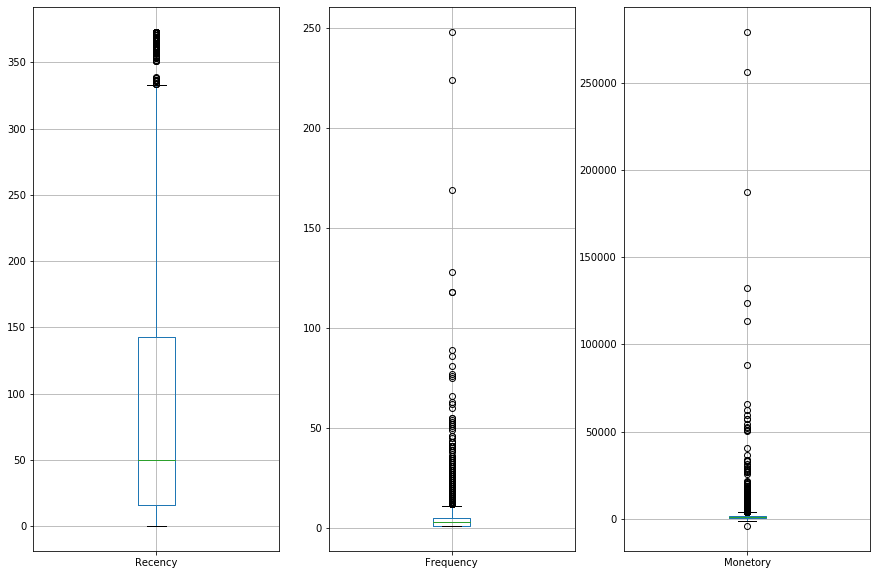

In [0]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,ncols=3,figsize=(15, 10))

# 1st plot
rfm_data.boxplot('Recency',ax=ax1)

# 2nd plot
rfm_data.boxplot('Frequency',ax=ax2)

# 3rd plot
rfm_data.boxplot('Monetory',ax=ax3)

In [0]:
rfm_data.shape, (rfm_data['Frequency']>50).sum(), (rfm_data['Monetory']>10000).sum()

((4372, 7), 24, 97)

In [0]:
rfm_data = rfm_data[~(rfm_data['Frequency']>50)]
rfm_data = rfm_data[~(rfm_data['Monetory']>10000)]
rfm_data = rfm_data[~(rfm_data['Monetory']<0)]
rfm_data.shape

(4230, 7)

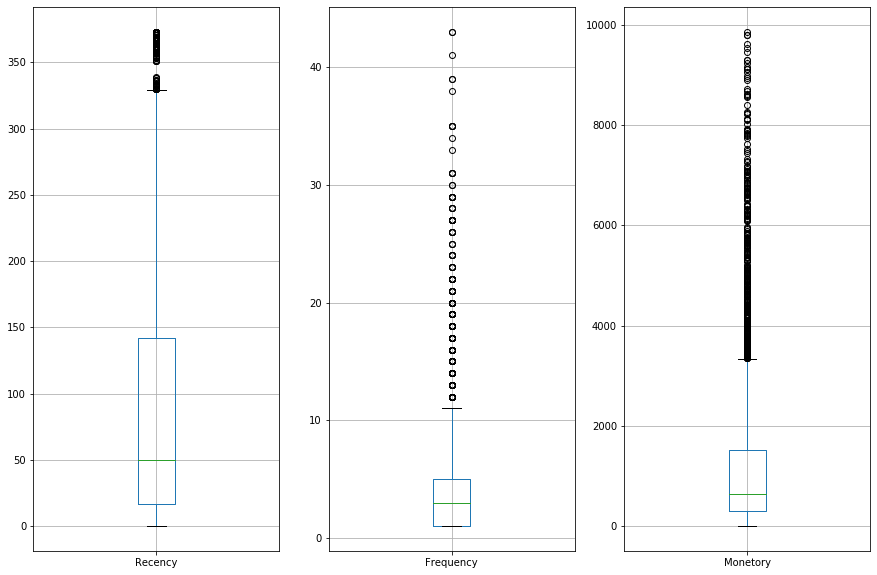

In [0]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,ncols=3,figsize=(15, 10))

# 1st plot
rfm_data.boxplot('Recency',ax=ax1)

# 2nd plot
rfm_data.boxplot('Frequency',ax=ax2)

# 3rd plot
rfm_data.boxplot('Monetory',ax=ax3)

In [0]:
# # Scale each feature to 0-1

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0, 1))

# features = list(rfm_data_copy.columns)
# scaler.fit(rfm_data_copy.iloc[:,1:])
# rfm_data_copy.iloc[:,1:] = pd.DataFrame(scaler.transform(rfm_data_copy.iloc[:,1:]))

# rfm_data_copy.columns = features
# rfm_data_copy.head()

In [0]:
# Elbow plot
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rfm_data['Frequency'].values.reshape(-1,1))
    Sum_of_squared_distances.append(km.inertia_)

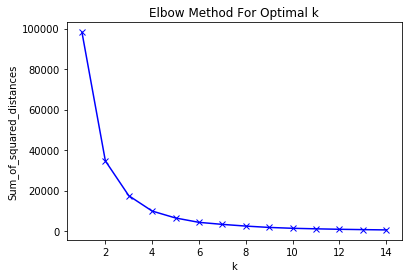

In [0]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [0]:
# 4 clusters look optimal for all the 3 columns R, F & M

In [0]:
# Let's cluster them all

kmeans_recency = KMeans(n_clusters=4, random_state=0).fit(rfm_data['Recency'].values.reshape(-1,1))
kmeans_freq = KMeans(n_clusters=4, random_state=0).fit(rfm_data['Frequency'].values.reshape(-1,1))
kmeans_monet = KMeans(n_clusters=4, random_state=0).fit(rfm_data['Monetory'].values.reshape(-1,1))

In [0]:
rfm_data['RecencyScore'] = kmeans_recency.predict(rfm_data['Recency'].values.reshape(-1,1))
rfm_data['FrequencyScore'] = kmeans_freq.predict(rfm_data['Frequency'].values.reshape(-1,1))
rfm_data['MonetoryScore'] = kmeans_monet.predict(rfm_data['Monetory'].values.reshape(-1,1))
rfm_data.head()

,CustomerID,Recency,Frequency,Monetory,Quantity,#Distinct_items,ASP,RecencyScore,FrequencyScore,MonetoryScore
0,12346,325,2,0.00,0,1,1.85,1,2,1
1,12347,2,7,4310.00,2458,103,1.43,3,0,3
2,12348,75,4,1797.24,2341,22,2.79,0,0,0
3,12349,18,1,1757.55,631,73,3.35,3,2,0
4,12350,310,1,334.40,197,17,11.67,1,2,1


Text(0, 0.5, 'Monetory')

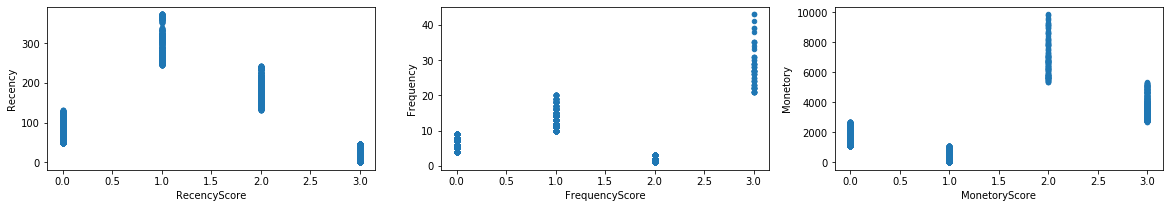

In [0]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,ncols=3,figsize=(20, 3))

# 1st plot
rfm_data.plot('RecencyScore','Recency',kind='scatter',ax=ax1)

# 2nd plot
rfm_data.plot('FrequencyScore','Frequency',kind='scatter',ax=ax2)

# 3rd plot
rfm_data.plot('MonetoryScore','Monetory',kind='scatter',ax=ax3)
ax3.set_xlabel('MonetoryScore')
ax3.set_ylabel('Monetory')


In [0]:
rfm_data['RecencyScore'].value_counts()

3    2060
0    1052
2     608
1     510
Name: RecencyScore, dtype: int64

In [0]:
rfm_data['FrequencyScore'].value_counts()

2    2578
0    1205
1     375
3      72
Name: FrequencyScore, dtype: int64

In [0]:
rfm_data['MonetoryScore'].value_counts()

1    2797
0     920
3     375
2     138
Name: MonetoryScore, dtype: int64

In [0]:
kmeans_monet.cluster_centers_

array([[1721.94931298],
       [ 434.9225216 ],
       [6967.96471014],
       [3700.23326471]])

Frequency and Monetory have a few outliers which are clubbed together in 1st cluster for both. For now lets assign them to the next nearest cluster.

Also the ordering is less inutuitive, lets make them a bit structured

In [0]:
# best recency for now is 3>0>2>1, we want 1-4 orders
rfm_data['RecencyScore'] = rfm_data['RecencyScore']+10
rfm_data.loc[(rfm_data['RecencyScore'] == 13),'RecencyScore'] = 1
rfm_data.loc[(rfm_data['RecencyScore'] == 10),'RecencyScore'] = 2
rfm_data.loc[(rfm_data['RecencyScore'] == 12),'RecencyScore'] = 3
rfm_data.loc[(rfm_data['RecencyScore'] == 11),'RecencyScore'] = 4

# best frequency for now is 3>1>0>2, we want 1-3 orders
rfm_data['FrequencyScore'] = rfm_data['FrequencyScore']+10
rfm_data.loc[(rfm_data['FrequencyScore'] == 13),'FrequencyScore'] = 1
rfm_data.loc[(rfm_data['FrequencyScore'] == 11),'FrequencyScore'] = 1
rfm_data.loc[(rfm_data['FrequencyScore'] == 10),'FrequencyScore'] = 2
rfm_data.loc[(rfm_data['FrequencyScore'] == 12),'FrequencyScore'] = 3

# best recency for now is 2>3>0>1, we want 1-3 orders
rfm_data['MonetoryScore'] = rfm_data['MonetoryScore']+10
rfm_data.loc[(rfm_data['MonetoryScore'] == 12),'MonetoryScore'] = 1
rfm_data.loc[(rfm_data['MonetoryScore'] == 13),'MonetoryScore'] = 1
rfm_data.loc[(rfm_data['MonetoryScore'] == 10),'MonetoryScore'] = 2
rfm_data.loc[(rfm_data['MonetoryScore'] == 11),'MonetoryScore'] = 3

Text(0, 0.5, 'Monetory')

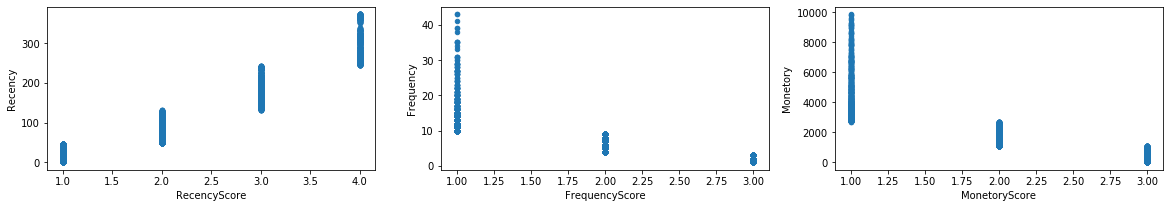

In [0]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,ncols=3,figsize=(20, 3))

# 1st plot
rfm_data.plot('RecencyScore','Recency',kind='scatter',ax=ax1)

# 2nd plot
rfm_data.plot('FrequencyScore','Frequency',kind='scatter',ax=ax2)

# 3rd plot
rfm_data.plot('MonetoryScore','Monetory',kind='scatter',ax=ax3)
ax3.set_xlabel('MonetoryScore')
ax3.set_ylabel('Monetory')


In [0]:
col_list= list(rfm_data.iloc[:,4:7])
rfm_data['RFM_Score'] = rfm_data[col_list].sum(axis=1)
rfm_data['RFM_Segment'] = rfm_data['RecencyScore']*100 + rfm_data['FrequencyScore']*10 + rfm_data['MonetoryScore']
rfm_data.head()

,CustomerID,Recency,Frequency,Monetory,Quantity,#Distinct_items,ASP,RecencyScore,FrequencyScore,MonetoryScore,RFM_Score,RFM_Segment
0,12346,325,2,0.00,0,1,1.85,4,3,3,2.85,433
1,12347,2,7,4310.00,2458,103,1.43,1,2,1,2562.43,121
2,12348,75,4,1797.24,2341,22,2.79,2,2,2,2365.79,222
3,12349,18,1,1757.55,631,73,3.35,1,3,2,707.35,132
4,12350,310,1,334.40,197,17,11.67,4,3,3,225.67,433


In [0]:
rfm_data_6mon_1 = rfm_data_6mon_1[~(rfm_data_6mon_1['Frequency']>50)]
rfm_data_6mon_1 = rfm_data_6mon_1[~(rfm_data_6mon_1['Monetory']>10000)]
rfm_data_6mon_1 = rfm_data_6mon_1[~(rfm_data_6mon_1['Monetory']<0)]
rfm_data_6mon_1.shape

# Let's cluster them all

kmeans_recency = KMeans(n_clusters=4, random_state=0).fit(rfm_data_6mon_1['Recency'].values.reshape(-1,1))
kmeans_freq = KMeans(n_clusters=4, random_state=0).fit(rfm_data_6mon_1['Frequency'].values.reshape(-1,1))
kmeans_monet = KMeans(n_clusters=4, random_state=0).fit(rfm_data_6mon_1['Monetory'].values.reshape(-1,1))

rfm_data_6mon_1['RecencyScore'] = kmeans_recency.predict(rfm_data_6mon_1['Recency'].values.reshape(-1,1))
rfm_data_6mon_1['FrequencyScore'] = kmeans_freq.predict(rfm_data_6mon_1['Frequency'].values.reshape(-1,1))
rfm_data_6mon_1['MonetoryScore'] = kmeans_monet.predict(rfm_data_6mon_1['Monetory'].values.reshape(-1,1))
rfm_data_6mon_1.head()

,CustomerID,Recency,Frequency,Monetory,Quantity,#Distinct_items,ASP,RecencyScore,FrequencyScore,MonetoryScore
0,12346,133,2,0.00,0,1,1.85,1,0,1
1,12347,54,3,1823.43,1117,63,1.43,2,0,0
2,12348,56,3,1487.24,2124,22,2.79,2,0,0
3,12350,118,1,334.40,197,17,3.35,1,0,1
4,12352,70,8,601.18,188,26,11.67,2,2,1


Text(0, 0.5, 'Monetory')

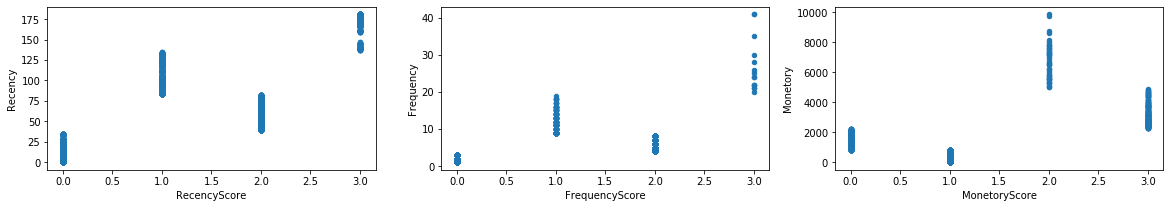

In [0]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,ncols=3,figsize=(20, 3))

# 1st plot
rfm_data_6mon_1.plot('RecencyScore','Recency',kind='scatter',ax=ax1)

# 2nd plot
rfm_data_6mon_1.plot('FrequencyScore','Frequency',kind='scatter',ax=ax2)

# 3rd plot
rfm_data_6mon_1.plot('MonetoryScore','Monetory',kind='scatter',ax=ax3)
ax3.set_xlabel('MonetoryScore')
ax3.set_ylabel('Monetory')

In [0]:
rfm_data_6mon_1['FrequencyScore'].value_counts()

0    1997
2     531
1     135
3      15
Name: FrequencyScore, dtype: int64

In [0]:
# best recency for now is 0>2>1>3, we want 1-4 orders
rfm_data_6mon_1['RecencyScore'] = rfm_data_6mon_1['RecencyScore']+10
rfm_data_6mon_1.loc[(rfm_data_6mon_1['RecencyScore'] == 10),'RecencyScore'] = 1
rfm_data_6mon_1.loc[(rfm_data_6mon_1['RecencyScore'] == 12),'RecencyScore'] = 2
rfm_data_6mon_1.loc[(rfm_data_6mon_1['RecencyScore'] == 11),'RecencyScore'] = 3
rfm_data_6mon_1.loc[(rfm_data_6mon_1['RecencyScore'] == 13),'RecencyScore'] = 4

# best frequency for now is 3>1>2>0, we want 1-3 orders
rfm_data_6mon_1['FrequencyScore'] = rfm_data_6mon_1['FrequencyScore']+10
rfm_data_6mon_1.loc[(rfm_data_6mon_1['FrequencyScore'] == 13),'FrequencyScore'] = 1
rfm_data_6mon_1.loc[(rfm_data_6mon_1['FrequencyScore'] == 11),'FrequencyScore'] = 1
rfm_data_6mon_1.loc[(rfm_data_6mon_1['FrequencyScore'] == 12),'FrequencyScore'] = 2
rfm_data_6mon_1.loc[(rfm_data_6mon_1['FrequencyScore'] == 10),'FrequencyScore'] = 3

# best recency for now is 2>3>1>0, we want 1-3 orders
rfm_data_6mon_1['MonetoryScore'] = rfm_data_6mon_1['MonetoryScore']+10
rfm_data_6mon_1.loc[(rfm_data_6mon_1['MonetoryScore'] == 12),'MonetoryScore'] = 1
rfm_data_6mon_1.loc[(rfm_data_6mon_1['MonetoryScore'] == 13),'MonetoryScore'] = 1
rfm_data_6mon_1.loc[(rfm_data_6mon_1['MonetoryScore'] == 10),'MonetoryScore'] = 2
rfm_data_6mon_1.loc[(rfm_data_6mon_1['MonetoryScore'] == 11),'MonetoryScore'] = 3

Text(0, 0.5, 'Monetory')

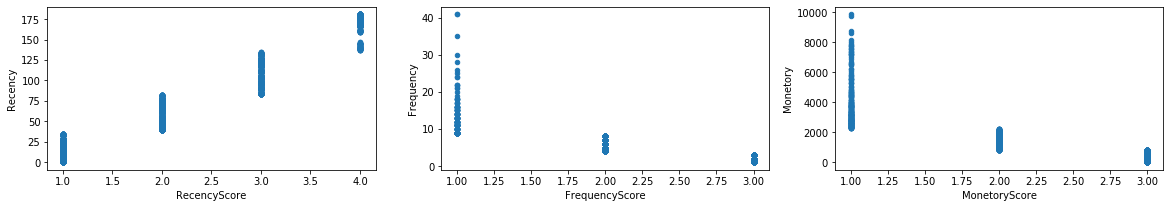

In [0]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,ncols=3,figsize=(20, 3))

# 1st plot
rfm_data_6mon_1.plot('RecencyScore','Recency',kind='scatter',ax=ax1)

# 2nd plot
rfm_data_6mon_1.plot('FrequencyScore','Frequency',kind='scatter',ax=ax2)

# 3rd plot
rfm_data_6mon_1.plot('MonetoryScore','Monetory',kind='scatter',ax=ax3)
ax3.set_xlabel('MonetoryScore')
ax3.set_ylabel('Monetory')

In [0]:
col_list= list(rfm_data_6mon_1.iloc[:,7:10])
rfm_data_6mon_1['RFM_Score'] = rfm_data_6mon_1[col_list].sum(axis=1)
rfm_data_6mon_1['RFM_Segment'] = rfm_data_6mon_1['RecencyScore']*100 + rfm_data_6mon_1['FrequencyScore']*10 + rfm_data_6mon_1['MonetoryScore']
rfm_data_6mon_1.head()

,CustomerID,Recency,Frequency,Monetory,Quantity,#Distinct_items,ASP,RecencyScore,FrequencyScore,MonetoryScore,RFM_Score,RFM_Segment
0,12346,133,2,0.00,0,1,1.85,3,3,3,9,333
1,12347,54,3,1823.43,1117,63,1.43,2,3,2,7,232
2,12348,56,3,1487.24,2124,22,2.79,2,3,2,7,232
3,12350,118,1,334.40,197,17,3.35,3,3,3,9,333
4,12352,70,8,601.18,188,26,11.67,2,2,3,7,223


In [0]:
rfm_data_6mon_2 = rfm_data_6mon_2[~(rfm_data_6mon_2['Frequency']>50)]
rfm_data_6mon_2 = rfm_data_6mon_2[~(rfm_data_6mon_2['Monetory']>10000)]
rfm_data_6mon_2 = rfm_data_6mon_2[~(rfm_data_6mon_2['Monetory']<0)]
rfm_data_6mon_2.shape

# Let's cluster them all

kmeans_recency = KMeans(n_clusters=4, random_state=0).fit(rfm_data_6mon_2['Recency'].values.reshape(-1,1))
kmeans_freq = KMeans(n_clusters=4, random_state=0).fit(rfm_data_6mon_2['Frequency'].values.reshape(-1,1))
kmeans_monet = KMeans(n_clusters=4, random_state=0).fit(rfm_data_6mon_2['Monetory'].values.reshape(-1,1))

rfm_data_6mon_2['RecencyScore'] = kmeans_recency.predict(rfm_data_6mon_2['Recency'].values.reshape(-1,1))
rfm_data_6mon_2['FrequencyScore'] = kmeans_freq.predict(rfm_data_6mon_2['Frequency'].values.reshape(-1,1))
rfm_data_6mon_2['MonetoryScore'] = kmeans_monet.predict(rfm_data_6mon_2['Monetory'].values.reshape(-1,1))
rfm_data_6mon_2.head()

,CustomerID,Recency,Frequency,Monetory,Quantity,#Distinct_items,ASP,RecencyScore,FrequencyScore,MonetoryScore
0,12347,2,4,2486.57,1341,66,1.85,0,1,3
1,12348,75,1,310.00,217,3,1.43,3,0,0
2,12349,18,1,1757.55,631,73,2.79,0,0,3
3,12352,36,3,944.23,282,39,3.35,3,0,0
4,12356,22,1,58.35,5,2,11.67,0,0,0


Text(0, 0.5, 'Monetory')

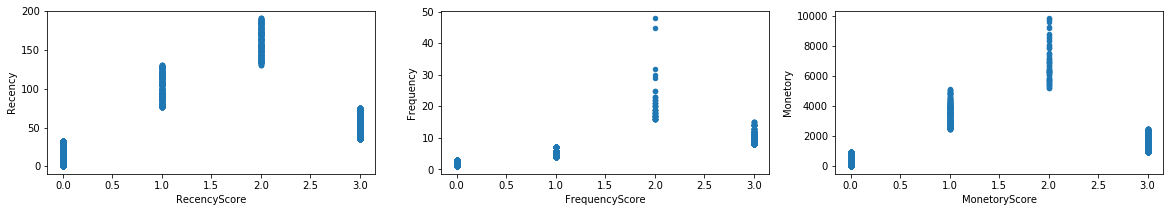

In [0]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,ncols=3,figsize=(20, 3))

# 1st plot
rfm_data_6mon_2.plot('RecencyScore','Recency',kind='scatter',ax=ax1)

# 2nd plot
rfm_data_6mon_2.plot('FrequencyScore','Frequency',kind='scatter',ax=ax2)

# 3rd plot
rfm_data_6mon_2.plot('MonetoryScore','Monetory',kind='scatter',ax=ax3)
ax3.set_xlabel('MonetoryScore')
ax3.set_ylabel('Monetory')

In [0]:
rfm_data_6mon_2['MonetoryScore'].value_counts()

0    2349
3     818
1     256
2      68
Name: MonetoryScore, dtype: int64

In [0]:
# best recency for now is 0>3>1>2, we want 1-4 orders
rfm_data_6mon_2['RecencyScore'] = rfm_data_6mon_2['RecencyScore']+10
rfm_data_6mon_2.loc[(rfm_data_6mon_2['RecencyScore'] == 10),'RecencyScore'] = 1
rfm_data_6mon_2.loc[(rfm_data_6mon_2['RecencyScore'] == 13),'RecencyScore'] = 2
rfm_data_6mon_2.loc[(rfm_data_6mon_2['RecencyScore'] == 11),'RecencyScore'] = 3
rfm_data_6mon_2.loc[(rfm_data_6mon_2['RecencyScore'] == 12),'RecencyScore'] = 4

# best frequency for now is 2>3>1>0, we want 1-3 orders
rfm_data_6mon_2['FrequencyScore'] = rfm_data_6mon_2['FrequencyScore']+10
rfm_data_6mon_2.loc[(rfm_data_6mon_2['FrequencyScore'] == 12),'FrequencyScore'] = 1
rfm_data_6mon_2.loc[(rfm_data_6mon_2['FrequencyScore'] == 13),'FrequencyScore'] = 1
rfm_data_6mon_2.loc[(rfm_data_6mon_2['FrequencyScore'] == 11),'FrequencyScore'] = 2
rfm_data_6mon_2.loc[(rfm_data_6mon_2['FrequencyScore'] == 10),'FrequencyScore'] = 3

# best recency for now is 2>1>3>0, we want 1-3 orders
rfm_data_6mon_2['MonetoryScore'] = rfm_data_6mon_2['MonetoryScore']+10
rfm_data_6mon_2.loc[(rfm_data_6mon_2['MonetoryScore'] == 12),'MonetoryScore'] = 1
rfm_data_6mon_2.loc[(rfm_data_6mon_2['MonetoryScore'] == 11),'MonetoryScore'] = 1
rfm_data_6mon_2.loc[(rfm_data_6mon_2['MonetoryScore'] == 13),'MonetoryScore'] = 2
rfm_data_6mon_2.loc[(rfm_data_6mon_2['MonetoryScore'] == 10),'MonetoryScore'] = 3

Text(0, 0.5, 'Monetory')

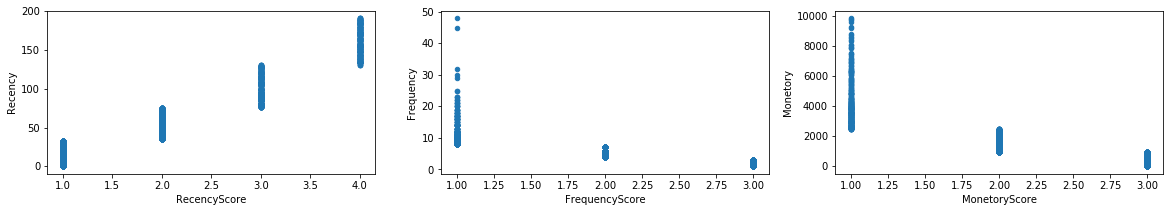

In [0]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,ncols=3,figsize=(20, 3))

# 1st plot
rfm_data_6mon_2.plot('RecencyScore','Recency',kind='scatter',ax=ax1)

# 2nd plot
rfm_data_6mon_2.plot('FrequencyScore','Frequency',kind='scatter',ax=ax2)

# 3rd plot
rfm_data_6mon_2.plot('MonetoryScore','Monetory',kind='scatter',ax=ax3)
ax3.set_xlabel('MonetoryScore')
ax3.set_ylabel('Monetory')

In [0]:
col_list= list(rfm_data_6mon_2.iloc[:,7:10])
rfm_data_6mon_2['RFM_Score'] = rfm_data_6mon_2[col_list].sum(axis=1)
rfm_data_6mon_2['RFM_Segment'] = rfm_data_6mon_2['RecencyScore']*100 + rfm_data_6mon_2['FrequencyScore']*10 + rfm_data_6mon_2['MonetoryScore']
rfm_data_6mon_2.head()

,CustomerID,Recency,Frequency,Monetory,Quantity,#Distinct_items,ASP,RecencyScore,FrequencyScore,MonetoryScore,RFM_Score,RFM_Segment
0,12347,2,4,2486.57,1341,66,1.85,1,2,2,5,122
1,12348,75,1,310.00,217,3,1.43,2,3,3,8,233
2,12349,18,1,1757.55,631,73,2.79,1,3,2,6,132
3,12352,36,3,944.23,282,39,3.35,2,3,3,8,233
4,12356,22,1,58.35,5,2,11.67,1,3,3,7,133


Let's merge H1 and H2 and see how good RFM segmentation works

In [0]:
# flattening multiindex columns
rfm_data_6mon_2.columns = rfm_data_6mon_2.columns.get_level_values(0)

In [0]:
rfm_data_6mon_1.columns = rfm_data_6mon_1.columns.get_level_values(0)

In [0]:
rfm_data_6mon_1.groupby('RFM_Score')['Monetory'].mean()

RFM_Score
3     4354.341800
4     2946.781429
5     1683.321861
6     1154.163170
7      526.258909
8      436.832985
9      325.396218
10     253.527075
Name: Monetory, dtype: float64

In [0]:
rfm_data_6mon_1.loc[rfm_data_6mon_1['RFM_Score'] <5,'RFM_Category'] = 'Good'
rfm_data_6mon_1.loc[(rfm_data_6mon_1['RFM_Score'] <8) & (rfm_data_6mon_1['RFM_Score'] >=5),'RFM_Category'] = 'Avg'
rfm_data_6mon_1.loc[(rfm_data_6mon_1['RFM_Score'] <12) & (rfm_data_6mon_1['RFM_Score'] >=8),'RFM_Category'] = 'Bad'

rfm_data_6mon_1.head()

,CustomerID,Recency,Frequency,Monetory,Quantity,#Distinct_items,ASP,RecencyScore,FrequencyScore,MonetoryScore,RFM_Score,RFM_Segment,RFM_Category
0,12346,133,2,0.00,0,1,1.85,3,3,3,9,333,Bad
1,12347,54,3,1823.43,1117,63,1.43,2,3,2,7,232,Avg
2,12348,56,3,1487.24,2124,22,2.79,2,3,2,7,232,Avg
3,12350,118,1,334.40,197,17,3.35,3,3,3,9,333,Bad
4,12352,70,8,601.18,188,26,11.67,2,2,3,7,223,Avg


In [0]:
rfm_data_6mon_1.groupby('RFM_Category')['Monetory'].mean()

RFM_Category
Avg      932.498128
Bad      359.502800
Good    3610.725000
Name: Monetory, dtype: float64

In [0]:
rfm_data_6mon_2.loc[rfm_data_6mon_2['RFM_Score'] <5,'RFM_Category'] = 'Good'
rfm_data_6mon_2.loc[(rfm_data_6mon_2['RFM_Score'] <8) & (rfm_data_6mon_2['RFM_Score'] >=5),'RFM_Category'] = 'Avg'
rfm_data_6mon_2.loc[(rfm_data_6mon_2['RFM_Score'] <12) & (rfm_data_6mon_2['RFM_Score'] >=8),'RFM_Category'] = 'Bad'

rfm_data_6mon_2.groupby('RFM_Category')['Monetory'].mean()

RFM_Category
Avg      959.761579
Bad      395.390896
Good    3537.126174
Name: Monetory, dtype: float64

In [0]:
rfm_data.to_csv('rfm_data.csv')
rfm_data_6mon_1.to_csv('rfm_data_6mon_1.csv')
rfm_data_6mon_2.to_csv('rfm_data_6mon_2.csv')

Let's try prediction

In [0]:
X = rfm_data_6mon_1.merge(rfm_data_6mon_2[['CustomerID','Monetory']], how='inner', on = 'CustomerID',suffixes=['_h1','_h2']).iloc[:,:7]
y = rfm_data_6mon_1.merge(rfm_data_6mon_2[['CustomerID','Monetory']], how='inner', on = 'CustomerID',suffixes=['_h1','_h2']).iloc[:,-1]

In [0]:
customer_age = (datetime.date(2011, 5, 31) - raw_data_6mon_1.groupby('CustomerID')['InvoiceDate'].min()).astype('timedelta64[D]').astype(int).to_frame().reset_index()
customer_age.columns = ['CustomerID','Age']
X = X.merge(customer_age, how = 'left', on = 'CustomerID')
X.drop(columns = ['CustomerID'], inplace = True)
X.head()

,Recency,Frequency,Monetory_h1,Quantity,#Distinct_items,ASP,Age
0,54,3,1823.43,1117,63,1.43,175
1,56,3,1487.24,2124,22,2.79,166
2,70,8,601.18,188,26,11.67,104
3,53,2,2753.08,1586,53,2.16,133
4,48,3,2350.61,605,93,2.45,139


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
# X_test.fillna(0,inplace =True)
# X_test.loc[np.isposinf(X_test['ASP']),'ASP'] = 10

In [0]:
X_train.isnull().sum()

Recency            0
Frequency          0
Monetory_h1        0
Quantity           0
#Distinct_items    0
ASP                1
Age                0
dtype: int64

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

y_pred = regressor.predict(X_test)

print('Mean Squared Monetory Value of y_test:', mean(np.square(y_test))) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared:',r2_score(y_test, y_pred))

Mean Squared Monetory Value of y_test: 3814645.137170728
Mean Squared Error: 1248474.8656421176
Root Mean Squared Error: 1117.351719756191
R squared: 0.4137868676960913


In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = sm.add_constant(X_train)
results = sm.OLS(y_train, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Monetory_h2   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     249.6
Date:                Sun, 10 Nov 2019   Prob (F-statistic):          1.14e-240
Time:                        20:04:24   Log-Likelihood:                -11635.
No. Observations:                1401   AIC:                         2.329e+04
Df Residuals:                    1393   BIC:                         2.333e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             383.9781     66.129     

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
